## MODELO GARCH
Extraído de 
https://github.com/ritvikmath/Time-Series-Analysis/blob/master/GARCH%20Model.ipynb

In [1]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Modelo GARCH(2,2)

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [2]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1) ## para entrenar 

series = [gauss(0,1), gauss(0,1)] ## [a_0, a_1]
vols = [1, 1] ## [sigma_0, sigma_1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

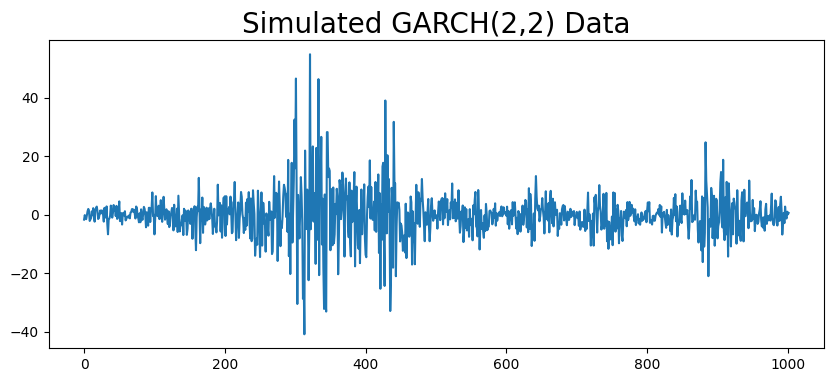

In [3]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

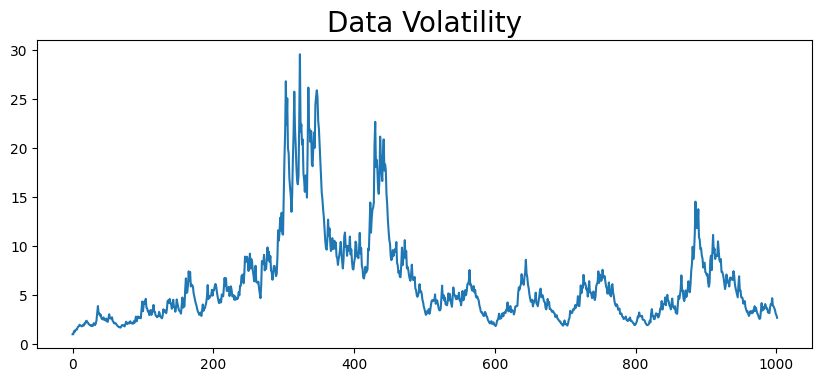

In [4]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

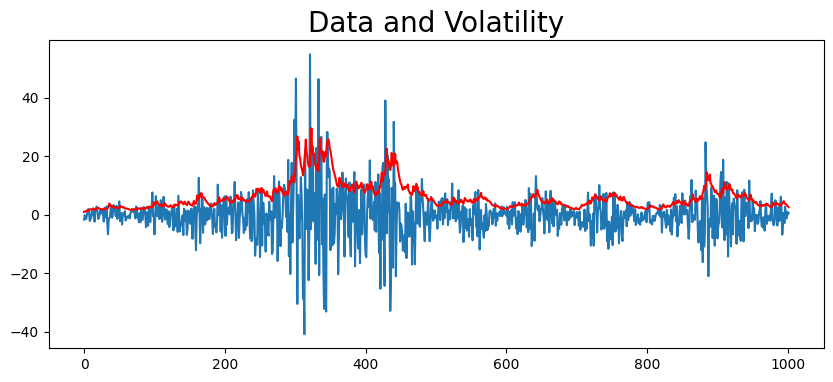

In [5]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

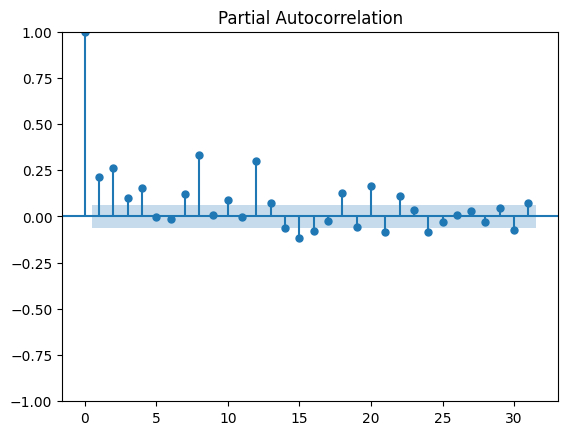

In [6]:
plot_pacf(np.array(series)**2)
plt.show()

# Ajuste de un modelo GARCH

In [7]:
train, test = series[:-test_size], series[-test_size:]

In [8]:
model = arch_model(train, p=2, q=2)

In [9]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 1124678173.8480334
Iteration:      2,   Func. Count:     17,   Neg. LLF: 74759.17957840266
Iteration:      3,   Func. Count:     26,   Neg. LLF: 3405.8706280299384
Iteration:      4,   Func. Count:     34,   Neg. LLF: 2806.3770834346697
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2803.6183823409765
Iteration:      6,   Func. Count:     50,   Neg. LLF: 2765.4392156453905
Iteration:      7,   Func. Count:     58,   Neg. LLF: 2772.34229295541
Iteration:      8,   Func. Count:     66,   Neg. LLF: 2758.0719708779898
Iteration:      9,   Func. Count:     74,   Neg. LLF: 2754.636429808351
Iteration:     10,   Func. Count:     81,   Neg. LLF: 2775.74048306665
Iteration:     11,   Func. Count:     89,   Neg. LLF: 2754.485108307842
Iteration:     12,   Func. Count:     96,   Neg. LLF: 2754.4290875935294
Iteration:     13,   Func. Count:    103,   Neg. LLF: 2754.427607376154
Iteration:     14,   Func. Count:    110,   Neg. LLF: 2754.

In [10]:
model_fit.summary()

C:\Users\kisby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
C:\Users\kisby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
C:\Users\kisby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\l

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2754.43
Distribution:                  Normal   AIC:                           5520.85
Method:            Maximum Likelihood   BIC:                           5549.68
                                        No. Observations:                  902
Date:                Sat, Dec 02 2023   Df Residuals:                      901
Time:                        09:34:08   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.2041      0.120     -1.707  8.773e-02 [ -0.438,3.018e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.4713      0.188      2.512  1.200e-02      [  0.104,  0.839]
alpha[1]   8.8757e-03  3.763e-02      0.236      0.814 [-6.489e-02,8.264e-02]
alpha[2]       0.2668  3.754e-02      7.107  1.188e-12      [  0.193,  0.340]
beta[1]        0.2264      0.156      1.447      0.148   [-8.027e-02,  0.533]
beta[2]        0.4979      0.135      3.677  2.356e-04      [  0.233,  0.763]
=============================================================================

Covariance estimator: robust
"""

# Predicción

In [11]:
predictions = model_fit.forecast(horizon=test_size)

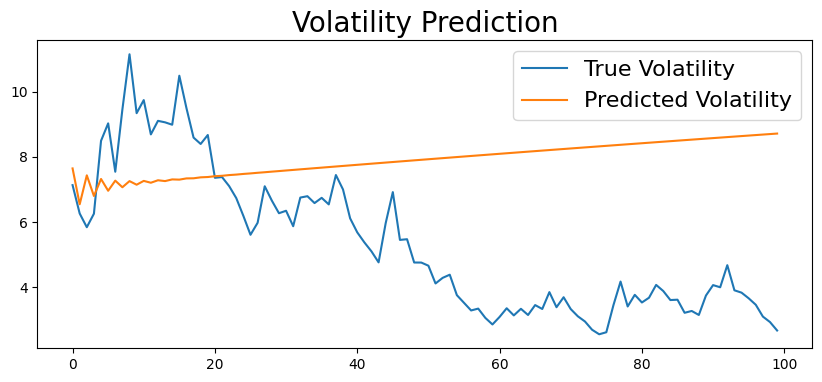

In [12]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

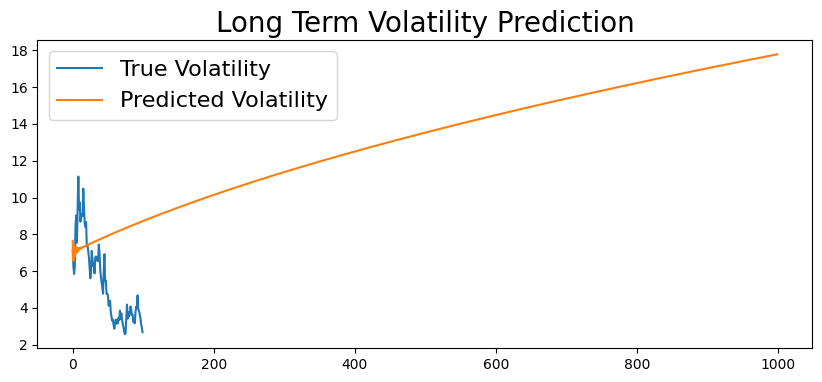

In [13]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [14]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

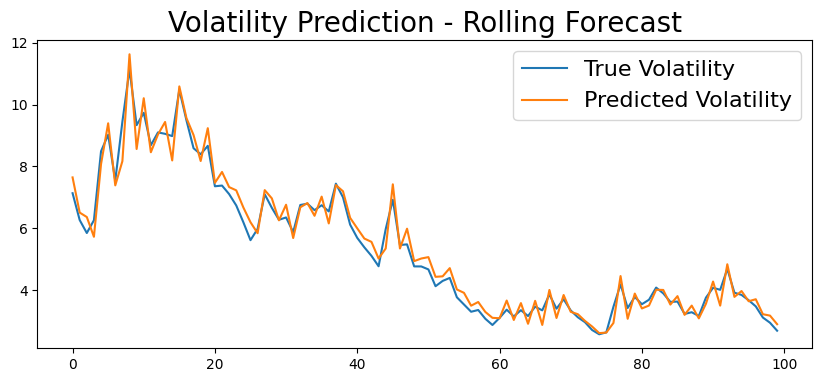

In [15]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)